# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv
import datetime as dt 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#today's date
todays_date = dt.date.today().strftime('%m/%d/%Y')

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [92]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [95]:
# test to see if the API call works
base_url = "http://api.openweathermap.org/data/2.5/weather?"

city_name = cities[0]

print(city_name)

# Build query URL based on current element in units
query_url = base_url + "appid=" + weather_api_key + "&q=" + city #+ "&units=" + unit

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

print(json.dumps(weather_json, indent=4))

mnogovershinnyy
{
    "coord": {
        "lon": 22.13,
        "lat": -30.97
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 285.719,
        "pressure": 1018.4,
        "humidity": 43,
        "temp_min": 285.719,
        "temp_max": 285.719,
        "sea_level": 1018.4,
        "grnd_level": 867.75
    },
    "wind": {
        "speed": 1.31,
        "deg": 205.506
    },
    "clouds": {
        "all": 0
    },
    "dt": 1553756187,
    "sys": {
        "message": 0.0032,
        "country": "ZA",
        "sunrise": 1553747973,
        "sunset": 1553790815
    },
    "id": 1014034,
    "name": "Carnarvon",
    "cod": 200
}


In [96]:
# URL for city -- api.openweathermap.org/data/2.5/weather?q=London
# URL for lat/lon -- api.openweathermap.org/data/2.5/weather?lat=35&lon=139

print("Beginning Data Retrieval")
print("-" * 30)

# use list of units
unit = "imperial" #"metric"

# set up lists to hold City, Cloudiness, Country, Date, Humidity, Lat, Lng, Max Temp, Wind Speed
cities_that_exist = []
cloudiness = []
country = []
date = []
humidity = []
latitude = []
longitude = []
max_temperature = []
wind_speed = []

counter = 1

# loop throught the list of units and append them to temperatures list
for city in cities:
    
    print(f"Processing Record {counter} of {num_cities_in_list} | {city}")
    
    # Build query URL based on current element in units
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city + "&units=" + unit
    
    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()

    # Try to access key that doesn't exist
    #     try:

    #     except KeyError:
    #         print("City not found. Skipping...")

    if weather_json["cod"] == "404":
        print("City not found. Skipping...")
    else:
        cities_that_exist.append(city)
        cloudiness.append(weather_json["clouds"]["all"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        humidity.append(weather_json["main"]["humidity"])
        latitude.append(weather_json["coord"]["lat"])
        longitude.append(weather_json["coord"]["lon"])
        max_temperature.append(weather_json["main"]["temp_max"])
        wind_speed.append(weather_json["wind"]["speed"])

    #increment counter
    counter += 1
        
    # limit the number of API calls for testing
#     if counter == 50:
#         break

print("-" * 30)
print("Data Retrieval Complete")
print("-" * 30)      

#print(json.dumps(weather_json, indent=4))

Beginning Data Retrieval
------------------------------
Processing Record 1 of 630 | mnogovershinnyy
Processing Record 2 of 630 | arraial do cabo
Processing Record 3 of 630 | tuy hoa
Processing Record 4 of 630 | jamestown
Processing Record 5 of 630 | kerema
Processing Record 6 of 630 | edson
Processing Record 7 of 630 | thompson
Processing Record 8 of 630 | atikokan
Processing Record 9 of 630 | provideniya
Processing Record 10 of 630 | rikitea
Processing Record 11 of 630 | yellowknife
Processing Record 12 of 630 | coalcoman
City not found. Skipping...
Processing Record 13 of 630 | carnarvon
Processing Record 14 of 630 | ust-kamchatsk
City not found. Skipping...
Processing Record 15 of 630 | san fernando
Processing Record 16 of 630 | muros
Processing Record 17 of 630 | blackfoot
Processing Record 18 of 630 | marsh harbour
Processing Record 19 of 630 | wanning
Processing Record 20 of 630 | sao filipe
Processing Record 21 of 630 | lima
Processing Record 22 of 630 | flinders
Processing Rec

Processing Record 191 of 630 | pathein
Processing Record 192 of 630 | qeshm
Processing Record 193 of 630 | urumqi
City not found. Skipping...
Processing Record 194 of 630 | baghdad
Processing Record 195 of 630 | boa vista
Processing Record 196 of 630 | tabou
Processing Record 197 of 630 | hithadhoo
Processing Record 198 of 630 | chokwe
City not found. Skipping...
Processing Record 199 of 630 | talaya
Processing Record 200 of 630 | finschhafen
Processing Record 201 of 630 | pevek
Processing Record 202 of 630 | souillac
Processing Record 203 of 630 | conde
Processing Record 204 of 630 | port lincoln
Processing Record 205 of 630 | north bend
Processing Record 206 of 630 | margate
Processing Record 207 of 630 | villazon
City not found. Skipping...
Processing Record 208 of 630 | itubera
Processing Record 209 of 630 | ribeira grande
Processing Record 210 of 630 | alofi
Processing Record 211 of 630 | malanje
Processing Record 212 of 630 | grindavik
Processing Record 213 of 630 | tubruq
City n

City not found. Skipping...
Processing Record 378 of 630 | senanga
Processing Record 379 of 630 | farafangana
Processing Record 380 of 630 | alexandria
Processing Record 381 of 630 | loa janan
Processing Record 382 of 630 | burica
City not found. Skipping...
Processing Record 383 of 630 | luanda
Processing Record 384 of 630 | minas
Processing Record 385 of 630 | beihai
Processing Record 386 of 630 | nome
Processing Record 387 of 630 | uyuni
Processing Record 388 of 630 | ayan
Processing Record 389 of 630 | belaya gora
Processing Record 390 of 630 | ostrovnoy
Processing Record 391 of 630 | deputatskiy
Processing Record 392 of 630 | kruisfontein
Processing Record 393 of 630 | henties bay
Processing Record 394 of 630 | tilichiki
Processing Record 395 of 630 | waipawa
Processing Record 396 of 630 | hasaki
Processing Record 397 of 630 | gimli
Processing Record 398 of 630 | cabo san lucas
Processing Record 399 of 630 | kishanganj
Processing Record 400 of 630 | mandali
Processing Record 401 o

Processing Record 574 of 630 | lashio
Processing Record 575 of 630 | thinadhoo
Processing Record 576 of 630 | chiredzi
Processing Record 577 of 630 | hovd
Processing Record 578 of 630 | aginskoye
Processing Record 579 of 630 | camacupa
Processing Record 580 of 630 | korla
City not found. Skipping...
Processing Record 581 of 630 | lakes entrance
Processing Record 582 of 630 | cumadcad
Processing Record 583 of 630 | bukachacha
Processing Record 584 of 630 | qiongshan
Processing Record 585 of 630 | san juan del cesar
Processing Record 586 of 630 | asadabad
Processing Record 587 of 630 | ketchikan
Processing Record 588 of 630 | grand river south east
City not found. Skipping...
Processing Record 589 of 630 | baglung
Processing Record 590 of 630 | alekseyevka
Processing Record 591 of 630 | altay
Processing Record 592 of 630 | sulangan
Processing Record 593 of 630 | hailar
Processing Record 594 of 630 | krylovskaya
Processing Record 595 of 630 | odweyne
City not found. Skipping...
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [97]:
weather_data = pd.DataFrame(
			{
				"City": cities_that_exist,
				"Cloudiness": cloudiness,
				"Country": country,
				"Date": date,
				"Humidity": humidity,
				"Lat": latitude,
				"Lng": longitude,
				"Max Temp": max_temperature,
				"Wind Speed": wind_speed
			})

# Export file as a CSV, without the Pandas index, 
# but with the header
weather_data.to_csv(output_data_file, index=False, header=True)

weather_data.count()

City          568
Cloudiness    568
Country       568
Date          568
Humidity      568
Lat           568
Lng           568
Max Temp      568
Wind Speed    568
dtype: int64

In [98]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mnogovershinnyy,80,RU,1553756294,66,53.94,139.92,20.60,7.40
1,arraial do cabo,88,BR,1553756294,93,-22.97,-42.02,77.57,7.85
2,tuy hoa,0,VN,1553756294,65,13.08,109.30,87.83,9.53
3,jamestown,20,AU,1553756295,66,-33.21,138.60,71.27,5.61
4,kerema,20,PG,1553756295,93,-7.96,145.78,78.20,0.81


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

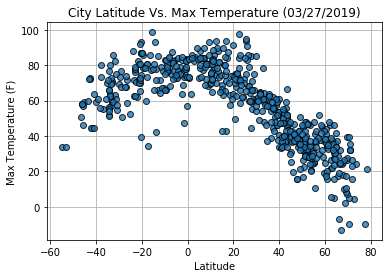

In [106]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", alpha=0.8, edgecolor="black",zorder=3)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature (" + todays_date + ")")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
#plt.xlim(-62,85)
#plt.ylim(weather_data["Max Temp"].min()-5, 105)
plt.grid(True, zorder=0)

# Save the figure
plt.savefig("output_plots/max_temp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

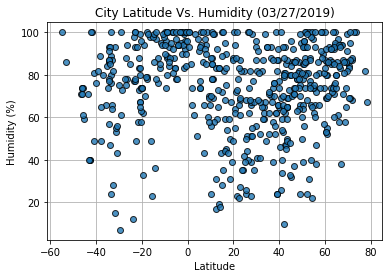

In [110]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", alpha=0.8, edgecolor="black",zorder=3)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity (" + todays_date + ")")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
#plt.xlim(-62,85)
plt.grid(True, zorder=0)

# Save the figure
plt.savefig("output_plots/humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

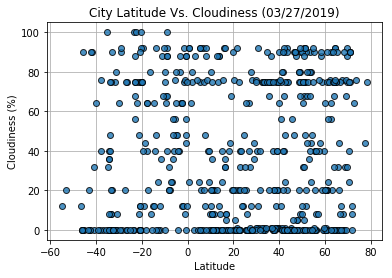

In [111]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", alpha=0.8, edgecolor="black",zorder=3)
print()
# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness (" + todays_date + ")")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
#plt.xlim(-62,85)
plt.grid(True, zorder=0)

# Save the figure
plt.savefig("output_plots/cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

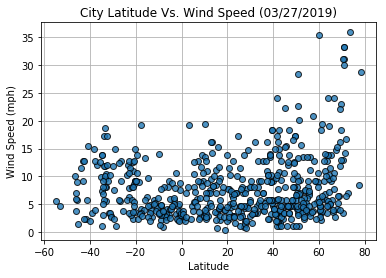

In [112]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", alpha=0.8, edgecolor="black",zorder=3)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed (" + todays_date + ")")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
#plt.xlim(-62,85)
plt.grid(True, zorder=0)

# Save the figure
plt.savefig("output_plots/wind_speed.png")

# Show plot
plt.show()